# Analysis

## 1. Import Modules

In [2]:
%load_ext autoreload
%autoreload 2

import os
import pandas as pd
import numpy as np
import seaborn as sns

path_parent = os.path.dirname(os.getcwd())

# if os.getcwd()[-8:] != 'HEALTH-ECONS':
#     os.chdir(path_parent)

print(os.getcwd())

import matplotlib.pyplot as plt

plt.style.use('seaborn-v0_8')
plt.rcParams.update({'font.family': 'Times New Roman'})
plt.rcParams.update({'axes.grid': True, 'axes.linewidth': 0.5, 'axes.edgecolor': 'black'})

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload
/Users/samaypanwar/Library/CloudStorage/OneDrive-NanyangTechnologicalUniversity/Uni/Y4S2/HEALTH ECONS/group_project


## 2. Dataset Information

In [3]:
df_premiums = pd.read_csv('data/main_data_file.csv')
df_premiums.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97134 entries, 0 to 97133
Data columns (total 9 columns):
 #   Column                                                 Non-Null Count  Dtype  
---  ------                                                 --------------  -----  
 0   State Code                                             97134 non-null  object 
 1   FIPS County Code                                       97134 non-null  int64  
 2   County Name                                            97134 non-null  object 
 3   Metal Level                                            97134 non-null  object 
 4   Issuer Name                                            97134 non-null  object 
 5   Premium Adult Individual Age 21                        97134 non-null  float64
 6   Medical Deductible - Individual - Standard             97134 non-null  float64
 7   Medical Maximum Out Of Pocket - Individual - Standard  97134 non-null  float64
 8   Time Trend                                     

In [4]:
df_covid = pd.read_csv('data/year_and_statewise_covid_cases.csv')
df_covid = df_covid.rename(columns = {
        'state': 'State Code',
        'date_updated': 'Time Trend',
        'new_cases': 'Cases'
        })

df_covid['Time Trend'] = list(map(lambda x: x.year, pd.to_datetime(df_covid['Time Trend'])))
print(df_covid.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180 entries, 0 to 179
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   State Code  180 non-null    object
 1   Time Trend  180 non-null    int64 
 2   Cases       180 non-null    int64 
dtypes: int64(2), object(1)
memory usage: 4.3+ KB
None


### 2.1 Value Counts


In [5]:
print(df_premiums['State Code'].value_counts().head(10))

TX    15013
FL    10023
MI     7595
GA     7584
SC     6274
NC     6094
IL     4131
OK     3994
MO     3906
OH     3502
Name: State Code, dtype: int64


In [6]:
print(df_premiums['County Name'].value_counts().head(10))

Marion        776
Jackson       696
Washington    671
Jefferson     670
Lincoln       621
Clay          585
Union         580
Monroe        569
Calhoun       553
Lake          524
Name: County Name, dtype: int64


In [7]:
df_premiums['Time Trend'].value_counts()

2022    20664
2021    19238
2020    17100
2017    16698
2019    11946
2018    11488
Name: Time Trend, dtype: int64

## 3. Plots for Numeric Data

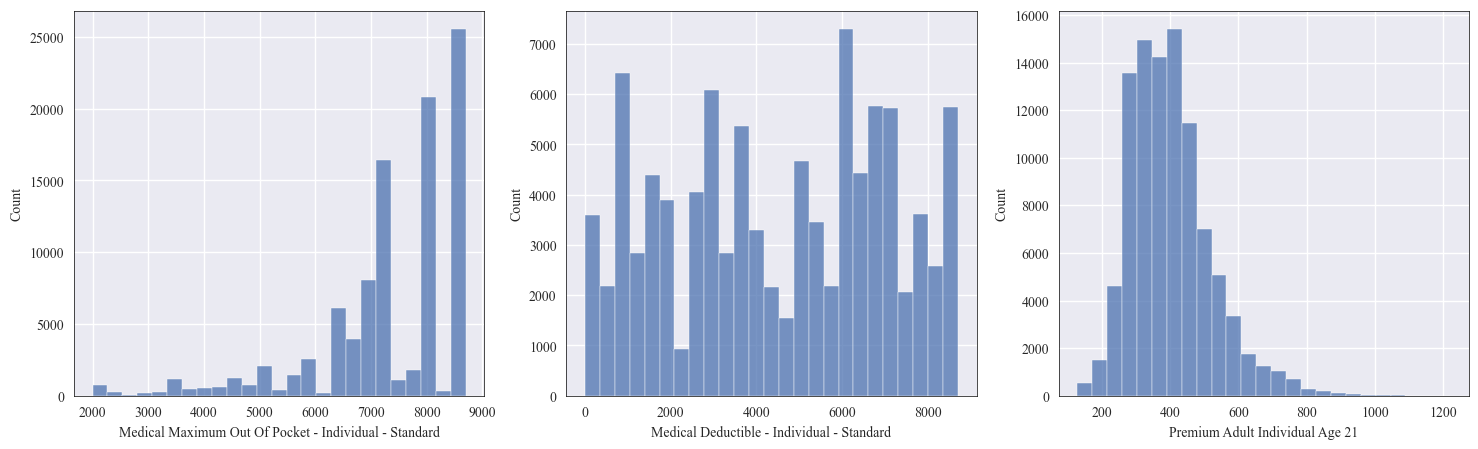

In [8]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
sns.histplot(df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], bins = 25, ax=ax[0]);
sns.histplot(df_premiums['Medical Deductible - Individual - Standard'], bins = 25, ax=ax[1]);
sns.histplot(df_premiums['Premium Adult Individual Age 21'], bins = 25, ax=ax[2]);

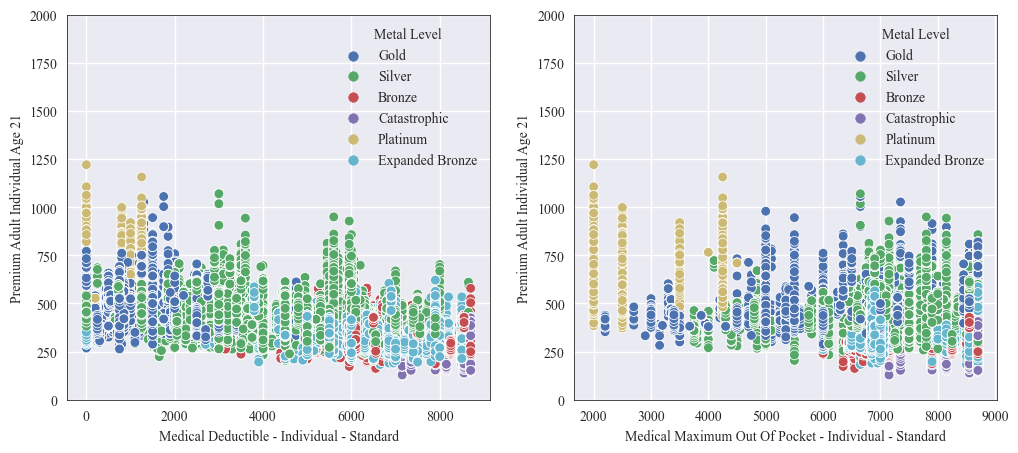

In [9]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[0], hue = df_premiums['Metal Level']);
sns.scatterplot(data = df_premiums, x = df_premiums['Medical Maximum Out Of Pocket - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[1], hue = df_premiums['Metal Level']);
ax[0].set_ylim(0, 2000);
ax[1].set_ylim(0, 2000);
# sns.scatterplot(data = df_premiums, x = df_premiums['Medical Deductible - Individual - Standard'], y = df_premiums['Premium Adult Individual Age 21'], ax=ax[0]);


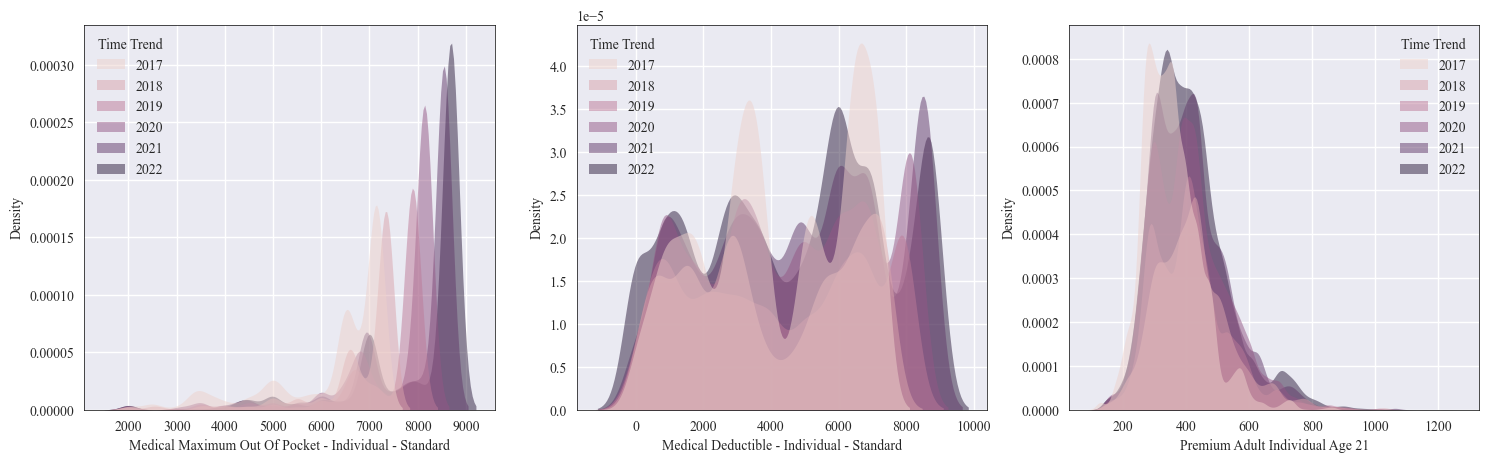

In [10]:
fig, ax = plt.subplots(nrows = 1, ncols = 3, figsize = (18, 5))
plot1 = sns.kdeplot(data = df_premiums, x = 'Medical Maximum Out Of Pocket - Individual - Standard', hue = 'Time Trend', ax=ax[0], fill=True,
   alpha=.5, linewidth=0);
plot2 = sns.kdeplot(data = df_premiums, x = 'Medical Deductible - Individual - Standard', hue = 'Time Trend', ax=ax[1], fill=True,
   alpha=.5, linewidth=0);
plot3 = sns.kdeplot(data = df_premiums, x = 'Premium Adult Individual Age 21', hue = 'Time Trend', ax=ax[2], fill=True,
   alpha=.5, linewidth=0);

sns.move_legend(plot1, "upper left")
sns.move_legend(plot2, "upper left")
sns.move_legend(plot3, "upper right")

<Axes: xlabel='Time Trend', ylabel='Premium Adult Individual Age 21'>

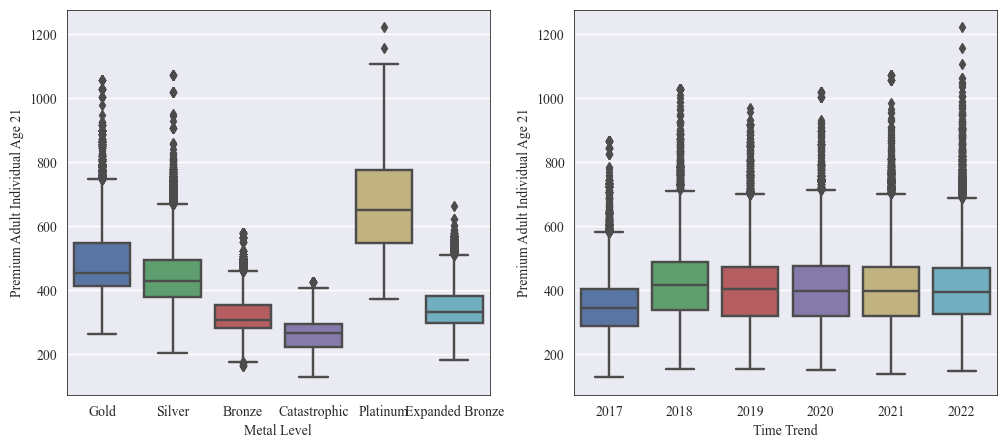

In [11]:
fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (12, 5))
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Metal Level'], ax=ax[0])
sns.boxplot(y = df_premiums['Premium Adult Individual Age 21'], x = df_premiums['Time Trend'], ax=ax[1])

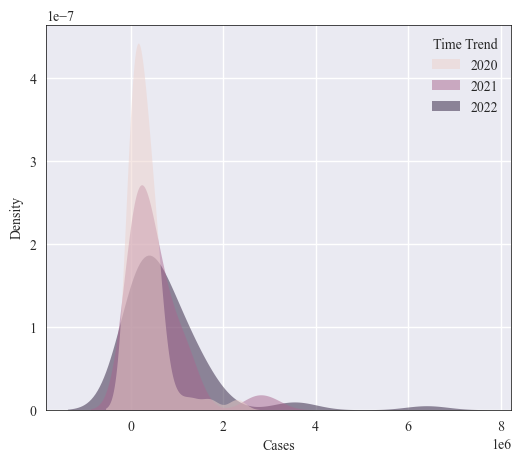

In [12]:
fig, ax = plt.subplots(nrows = 1, ncols = 1, figsize = (6, 5))

sns.kdeplot(x = df_covid['Cases'], fill=True,
   alpha=.5, linewidth=0, hue = df_covid['Time Trend']);

Model:

premium = max_oop + deductible + state_dummies + covid + state_dummies x covid + state_dummies x covid + covid_cases_in_state x state_dummies x covid + metal_level


## 4. KS Normality Test

In [13]:
from scipy.stats import kstest
import scipy
def multivariate_ks(series):

    statistic = []
    pvalue = []

    for col in series.columns:
        result = kstest(rvs = series[col], cdf = scipy.stats.norm.cdf)
        statistic.append(result.statistic)
        pvalue.append(result.pvalue)

    return pd.DataFrame(data = {'statistic': statistic, 'pvalue': pvalue}, index = series.columns)


In [14]:
numeric_variables = [
        'Premium Adult Individual Age 21',
        'Medical Deductible - Individual - Standard',
        'Medical Maximum Out Of Pocket - Individual - Standard',
        ]
print(multivariate_ks(df_premiums[numeric_variables]))

                                                    statistic  pvalue
Premium Adult Individual Age 21                      1.000000     0.0
Medical Deductible - Individual - Standard           0.968384     0.0
Medical Maximum Out Of Pocket - Individual - St...   1.000000     0.0


## 5. Create Dummies

In [87]:

df_political = pd.read_csv('data/cleaned_political_data.csv')
df_political

,State Code,Time Trend,Unity
0,AL,2017,Rep
1,AK,2017,Divided
2,AZ,2017,Rep
3,AR,2017,Rep
4,CA,2017,Dem
...,...,...,...
345,VA,2023,Divided
346,WA,2023,Dem
347,WV,2023,Rep
348,WI,2023,Divided


In [99]:
import statsmodels.api as sm

state_dummies = pd.get_dummies(df_premiums['State Code'])
plan_type = pd.get_dummies(df_premiums['Metal Level'])

df_regression = pd.merge(df_premiums, df_covid,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])

df_regression = pd.merge(df_regression, df_political,  how='left', left_on=['State Code','Time Trend'], right_on = ['State Code', 'Time Trend'])
df_regression.Cases = df_regression.Cases.fillna(0) / 1_000
# df_regression.info()

cols_to_drop = [
        'State Code',
        'FIPS County Code',
        'County Name',
        'Metal Level',
        'Issuer Name',
        'Time Trend',
        'Unity'
        ]

year_dummy = pd.get_dummies(df_regression['Time Trend'])
political_dummies = pd.get_dummies(df_regression['Unity'])
df_regression.drop(cols_to_drop, axis=1, inplace = True)
df_regression = pd.concat([df_regression, state_dummies, plan_type, year_dummy, political_dummies], axis=1)

# dummies_to_drop = [
#         'Bronze', # Base Metal Plan
#         'WY', # Base State
#         2017 # Base Year
#         ]
#
# df_regression.drop(dummies_to_drop, axis=1, inplace = True)

# df_regression.info()

In [100]:
df_regression.columns

Index([                      'Premium Adult Individual Age 21',
                  'Medical Deductible - Individual - Standard',
       'Medical Maximum Out Of Pocket - Individual - Standard',
                                                       'Cases',
                                                          'AK',
                                                          'AL',
                                                          'AR',
                                                          'AZ',
                                                          'DE',
                                                          'FL',
                                                          'GA',
                                                          'IL',
                                                          'IN',
                                                          'KS',
                                                          'KY',
                                        

In [113]:
import logging

#now we will Create and configure logger
logging.basicConfig(filename="log.log",
					format='%(message)s',
					filemode='w')

#Let us Create an object
logger=logging.getLogger()

#Now we are going to Set the threshold of logger to DEBUG
logger.setLevel(logging.DEBUG)


In [114]:
# dependent_variable = 'Premium Adult Individual Age 21'
# independent_variables = df_regression.columns.difference([dependent_variable])
# Y = df_regression[dependent_variable]
# X = df_regression[independent_variables]
#
# mod = sm.OLS(Y, X)
# res = mod.fit(cov_type = "HC0", use_t = True)
# !echo "" > log.log
# logger.info(res.summary())

In [115]:
df_regression.head()

,Premium Adult Individual Age 21,Medical Deductible - Individual - Standard,Medical Maximum Out Of Pocket - Individual - Standard,Cases,AK,AL,AR,AZ,DE,FL,...,Silver,2017,2018,2019,2020,2021,2022,Dem,Divided,Rep
0,866.0,1500.0,5000.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,743.0,3000.0,7150.0,0.0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0
2,580.0,6350.0,7150.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
3,578.0,5250.0,6500.0,0.0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0
4,723.0,3000.0,4100.0,0.0,1,0,0,0,0,0,...,1,1,0,0,0,0,0,0,1,0


In [117]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist() + plan_type.columns.tolist())
Y = df_regression[dependent_variable]
X = df_regression[independent_variables]

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
!echo "" > log.log
logger.warning("BASE MODEL")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [118]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist() + state_dummies.columns.tolist())
Y = df_regression[dependent_variable]
X = df_regression[independent_variables]

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [119]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable] + year_dummy.columns.tolist())
Y = df_regression[dependent_variable]
X = df_regression[independent_variables]

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")

In [120]:
# Simple OLS with no time/state/plan type correction
dependent_variable = 'Premium Adult Individual Age 21'
independent_variables = df_regression.columns.difference([dependent_variable])
Y = df_regression[dependent_variable]
X = df_regression[independent_variables]

mod = sm.OLS(Y, X)
res = mod.fit(cov_type = "HC0", use_t = True)
logger.warning("BASE MODEL | PLAN FIXED EFFECTS + STATE FIXED EFFECTS + YEAR FIXED EFFECTS")
logger.debug("----------------------------------------------------------------")
logger.info(res.summary())
logger.info("\n \n")